In [2]:
#CIFAR-10のデータセットとcv2をインポート
#目標：普通に学習したときは、７０%程度の正解率。目標の精度を80%程度に定める。
#50%の縮小画像を入力画像として作り、それがどれほどの正解率を出すか調べる。
import cv2
import numpy as np
from keras.datasets import cifar10
from keras import models
from keras import layers
from keras.layers import Dense
from keras.layers import Dense, BatchNormalization, Activation
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

input=[]
input2=[]

for i in range(50000):

  sample=x_train[i].copy()
  sample=cv2.resize(sample, dsize=(16,16))
  sample=cv2.resize(sample, dsize=(32,32), interpolation=cv2.INTER_NEAREST)
  input.append(sample)


input = np.array(input)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Using TensorFlow backend.
/Users/kimurataichi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kimurataichi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kimurataichi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kimurataichi/opt

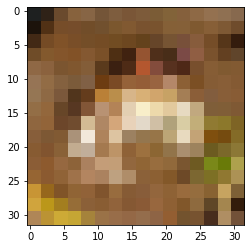

label:  50%


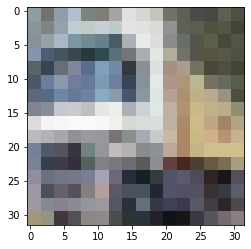

label:  50%


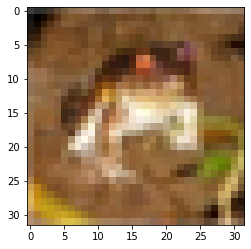

label:  画像


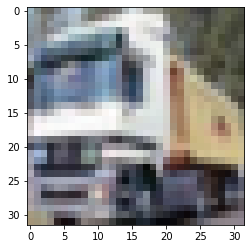

label:  画像


In [10]:
#５０％とオリジナルの画像を見比べてみる。
#人の目で判別するのは難しい。
for i in range(2):
    plt.gray()
    plt.imshow(input[i].reshape((32,32,3)))
    plt.show()
    print("label: ","50%")
for i in range(2):
    plt.gray()
    plt.imshow(x_train[i].reshape((32,32,3)))
    plt.show()
    print("label: ","画像")

In [4]:
#モデル
#活性化関数「ReLU（Rectified Linear Unit）- ランプ関数」。入力が0以下の時は出力0。入力が0より大きい場合はそのまま出力する。
#過学習を防止するためにバッチノーマライゼーションを使う。
#Flattenで次元を減らす。
#Denseをつかい、softmaxを加え精度を高める
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv

In [5]:
#学習のためのモデル設定
#２乗和誤差
#rmspropを使用する。
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [7]:
# 学習を実行
hist = model.fit(input, y_train,
    batch_size=32, epochs=20)
 
# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])



Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50000/50000 [==============================] - 347s 7ms/step - loss: 0.0666 - acc: 0.4724
Epoch 2/20
50000/50000 [==============================] - 353s 7ms/step - loss: 0.0532 - acc: 0.6039
Epoch 3/20
50000/50000 [==============================] - 324s 6ms/step - loss: 0.0469 - acc: 0.6583
Epoch 4/20
50000/50000 [==============================] - 342s 7ms/step - loss: 0.0430 - acc: 0.6892
Epoch 5/20
50000/50000 [==============================] - 454s 9ms/step - loss: 0.0398 - acc: 0.7151
Epoch 6/20
50000/50000 [==============================] - 476s 10ms/step - loss: 0.0371 - acc: 0.7357
Epoch 7/20
50000/50000 [==============================] - 360s 7ms/step - loss: 0.0346 - acc: 0.7555
Epoch 8/20
50000/50000 [==============================] - 357s 7ms/step - loss: 0.0324 - acc: 0.7726
Epoch 9/20
50000/50000 [==============================] - 325s 6ms/step - loss: 0.0304 - acc: 0.7874
Epoch 10/20
50000/50000 [=================

In [11]:
#考察
#今回のプロダクト課題では、cifar10を使って、50%の縮小画像を入力画像として作り、
#それが縮小前とどれほどの正解率を出すか調べた。
#reluを使ったり、BatchNormalization()を使うことで精度を高めた。
#model(input,y_train)の学習では、目標としていた80%を超えることができた。正解率も目標としていた７０％を超えることはできたが、
#そんなに精度の良いものは出来上がらなかった。
#５０％とオリジナルの画像を見比べてた時にも分かったことだが、オリジナル画像自体があまり画質の良いものではないのでこのような正解率しか出ないのだと考えた。
#もっと画質の良いオリジナル画像を使えば、もっと良い成果を得られるのではないかと思うのでこれを検証するのが今後の課題だ。